# Dehazing

In [2]:
import os
from pathlib import Path

SUB = "dehazing"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT = os.path.join(BASE_DIR, "out", SUB)
STATIC = os.path.join(BASE_DIR, "static", SUB)

In [3]:
import cv2
import matplotlib.pyplot as plt

import external.dark_channel_prior as dcp

# %matplotlib widget

In [4]:
def help_fig(col, row, titles, images, dpi=100.0):
    fig, axs = plt.subplots(col, row, dpi=dpi)
    if col > 1 or row > 1:
        for i, ax in enumerate(axs.flatten()):
            ax.set_title(titles[i])
            ax.imshow(images[i], cmap="gray")
            ax.set_axis_off()
    else:
        axs.set_title(titles[0])
        axs.imshow(images[0], cmap="gray")
        axs.set_axis_off()
    fig.tight_layout()
    plt.show()

## Dark Channel Prior

In [5]:
image = cv2.imread(os.path.join(STATIC, "hazy", "30_outdoor_hazy.jpg"))
image_i = image.astype('float64') / 255
image_dark = dcp.DarkChannel(image_i, 15)
image_a = dcp.AtmLight(image_i, image_dark)
image_te = dcp.TransmissionEstimate(image_i, image_a, 15)
image_t = dcp.TransmissionRefine(image, image_te)
image_j = dcp.Recover(image_i, image_t, image_a, 0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


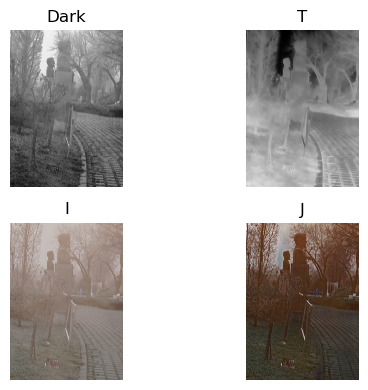

In [6]:
help_fig(2, 2, ["Dark", "T", "I", "J"], [image_dark, image_t, image_i, image_j])